In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
pl.rcParams['figure.facecolor'] = 'w'

In [2]:
from imf import imf

What is the mass-to-light ratio of a given population as a function of the powerlaw?

In [3]:
clusters, luminosities, masses, mean_luminosities, mean_masses = {},{},{},{},{}
for p in (2.0, 2.1, 2.2, 2.3, 2.4, 2.5):
    # make 100 clusters of 10^4 msun each (very good sampling of total mass range)
    clusters[p] = [imf.make_cluster(10000, 'kroupa', p3=p, silent=True, mmax=150) for x in range(100)]
    # cluster luminosities
    luminosities[p] = [imf.lum_of_cluster(cl) for cl in clusters[p]]
    masses[p] = [cl.sum() for cl in clusters[p]]
    mean_luminosities[p] = np.mean(luminosities[p])
    mean_masses[p] = np.mean(masses[p])

Text(0, 0.5, 'Mass / Light (Msun/Lsun)')

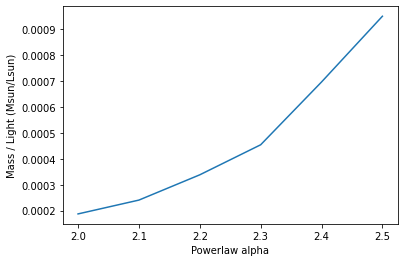

In [4]:
mass_to_light = [mean_masses[k]/10**mean_luminosities[k] for k in sorted(clusters.keys())]
pl.plot(sorted(clusters.keys()), mass_to_light)
pl.xlabel("Powerlaw alpha")
pl.ylabel("Mass / Light (Msun/Lsun)")

In [5]:
clusters, luminosities, masses, mean_luminosities, mean_masses = {},{},{},{},{}
for mmax in (50,100,150,200,250,300,500,1000):
    # make 100 clusters of 10^4 msun each (very good sampling of total mass range)
    clusters[mmax] = [imf.make_cluster(10000, 'kroupa', silent=True, mmax=mmax) for x in range(100)]
    # cluster luminosities
    luminosities[mmax] = [imf.lum_of_cluster(cl) for cl in clusters[mmax]]
    masses[mmax] = [cl.sum() for cl in clusters[mmax]]
    mean_luminosities[mmax] = np.mean(luminosities[mmax])
    mean_masses[mmax] = np.mean(masses[mmax])

Text(0, 0.5, 'Mass / Light (Msun/Lsun)')

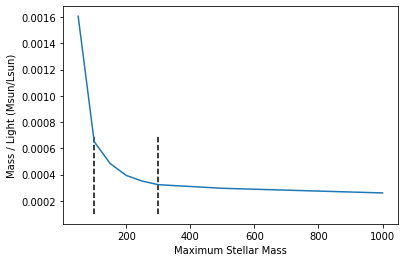

In [6]:
mass_to_light = [mean_masses[k]/10**mean_luminosities[k] for k in sorted(clusters.keys())]
pl.plot(sorted(clusters.keys()), mass_to_light)
pl.vlines([100,300],0.0001,0.0007,color='k', linestyle='--')
pl.xlabel("Maximum Stellar Mass")
pl.ylabel("Mass / Light (Msun/Lsun)")